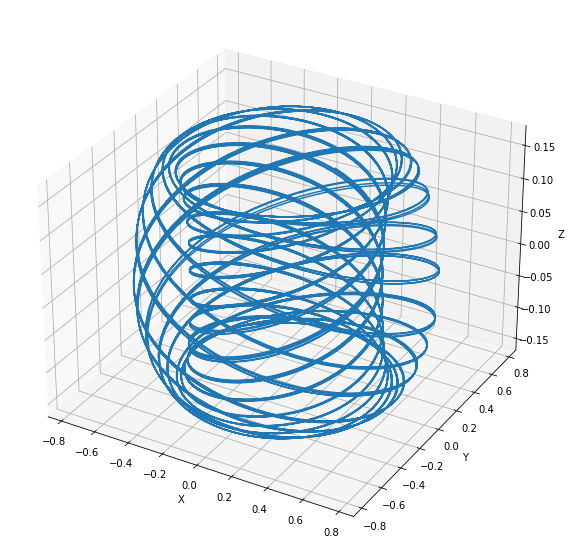

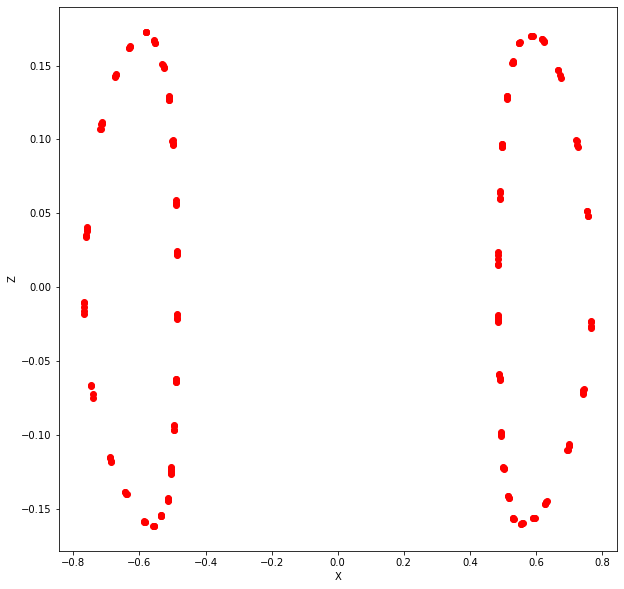

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.loadtxt("orbit.dat")

phi = data[:,0]
r = data[:,1]
z = data[:,2]

# Convert polar to Cartesian coordinates
x = r * np.sin(phi)
y = r * np.cos(phi)

# Initialize the 3D plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Plot the 3D field lines
ax.plot(x, y, z)

# Initialize lists to store crossing points
x_crossings = []
z_crossings = []

# Find the segments where the trajectory crosses the y=0 plane
for i in range(len(y) - 1):
    if y[i] * y[i+1] < 0:  # y changes sign between y[i] and y[i+1]
        # Linear interpolation to find the exact crossing point
        t = -y[i] / (y[i+1] - y[i])
        x_cross = x[i] + t * (x[i+1] - x[i])
        z_cross = z[i] + t * (z[i+1] - z[i])
        x_crossings.append(x_cross)
        z_crossings.append(z_cross)

# Create a new figure for the 2D plot
fig2, ax2 = plt.subplots(figsize=(10, 10))
ax2.set_xlabel("X")
ax2.set_ylabel("Z")

# Plot the crossings on the y=0 plane
ax2.scatter(x_crossings, z_crossings, color='red')

plt.show()


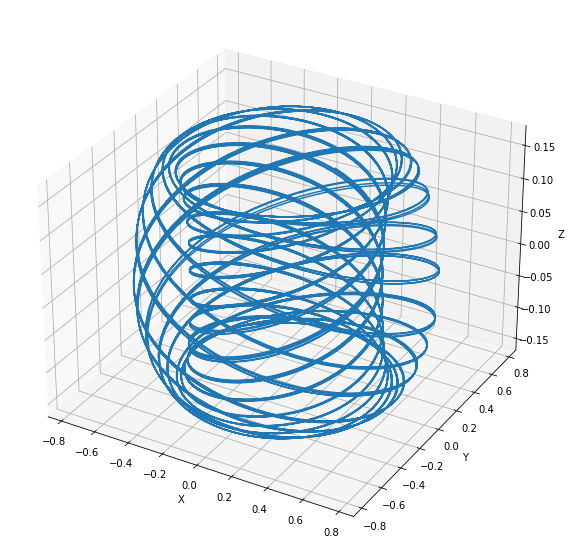

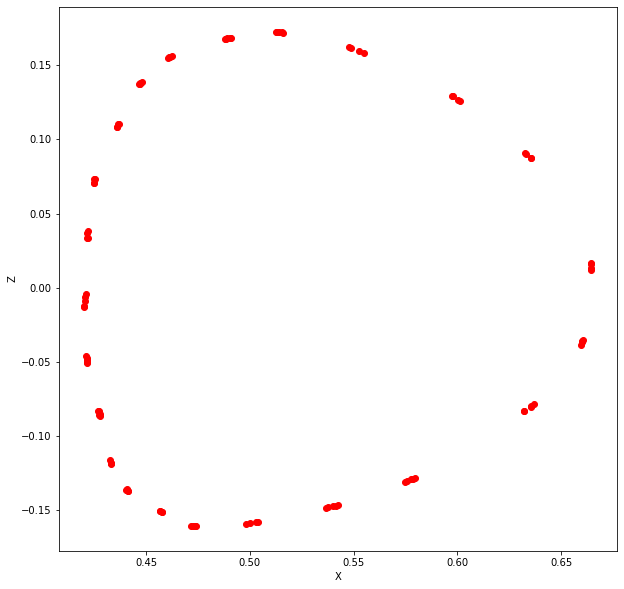

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.loadtxt("orbit.dat")

phi = data[:,0]
r = data[:,1]
z = data[:,2]

# Convert polar to Cartesian coordinates
x = r * np.sin(phi)
y = r * np.cos(phi)

# Wrap phi values within [0, 2*pi]
phi = np.mod(phi, 2*np.pi)

# Initialize the 3D plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Plot the 3D field lines
ax.plot(x, y, z)

# Define the target angle in radians
target_phi = np.radians(120)  # Convert 120 degrees to radians

# Initialize lists to store crossing points
x_crossings = []
y_crossings = []
z_crossings = []

# Find the segments where the trajectory crosses the specified phi plane
for i in range(len(phi) - 1):
    phi_diff = phi[i+1] - phi[i]
    # Adjust for crossing the 2*pi boundary
    if phi_diff > np.pi:
        phi_diff -= 2*np.pi
    elif phi_diff < -np.pi:
        phi_diff += 2*np.pi
    
    if (phi[i] - target_phi) * (phi[i] + phi_diff - target_phi) < 0:  # phi changes sign around target_phi
        # Linear interpolation to find the exact crossing point
        t = (target_phi - phi[i]) / phi_diff
        x_cross = x[i] + t * (x[i+1] - x[i])
        y_cross = y[i] + t * (y[i+1] - y[i])
        z_cross = z[i] + t * (z[i+1] - z[i])
        x_crossings.append(x_cross)
        y_crossings.append(y_cross)
        z_crossings.append(z_cross)

# Create a new figure for the 2D plot
fig2, ax2 = plt.subplots(figsize=(10, 10))
ax2.set_xlabel("X")
ax2.set_ylabel("Z")

# Plot the crossings on the specified phi plane
ax2.scatter(x_crossings, z_crossings, color='red')

plt.show()


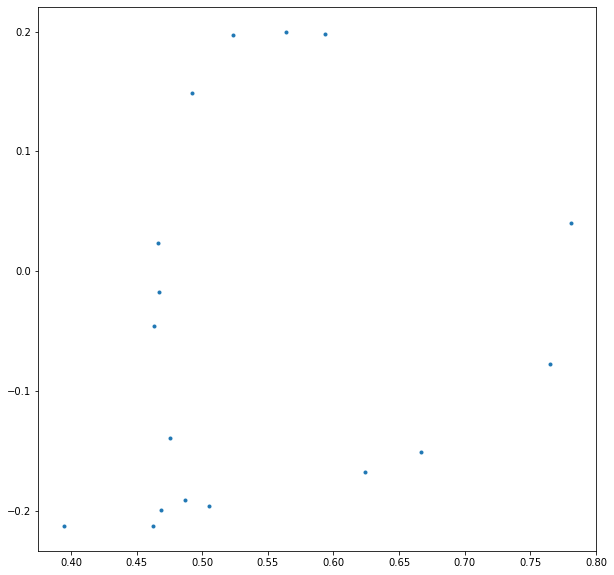

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data3 = np.loadtxt("crossings.dat")

R = data3[:,0]
Z = data3[:,1]

plt.figure(figsize=(10,10))
plt.scatter(R,Z, marker = ".")
plt.show()

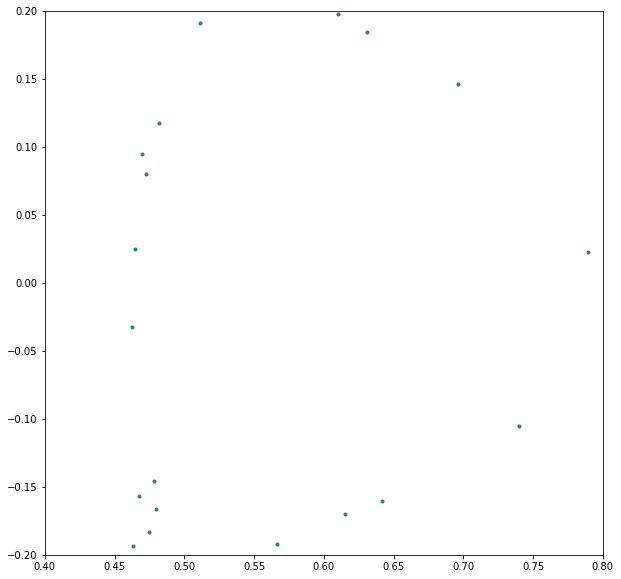

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data3 = np.loadtxt("crossings.dat")

R = data3[:,0]
Z = data3[:,1]

plt.figure(figsize=(10,10))
plt.scatter(R,Z, marker = ".")
plt.xlim(0.4,0.8)
plt.ylim(-0.2,0.2)
plt.show()